# Categories of Machine Learning

### Supervised Learning

- **Model relationship between measured features of training data and some label associated with the data. When the model is ready, it can be used to apply labels to new, unknown data.**
- Supervised Learning is subdivided into:
    - **Classification tasks**: Labels are discrete categories
        - *SVC: Support Vector Classifer*
        - *Gaussian naive Bayes*
        - *Random Forest Classifier*
        - *k-NN: k Nearest Neighbor*
    - **Regression tasks**: Labels are continous quantities
        - *Linear Regression*
        - *SVM: Support Vector Machine*
        - *Random Forest Regression*
- There is also "semi-supervised learning" methods when the data have incomplete labels

### Unsurpervised Learning
- **Model features of a dataset without refece to any label**
- Unsupervised LEarning is subdivided into:
    - **Clustering**: Infer labels on unlabeled data
        - *K-Means Clustering*
        - *Gaussian mixture models*
        - *Spectral clustering*
    - **Dimensionality Reduction**: Infer structure of unlabeled data. Search for more succint representation of the data
        - *Manifold Learning*
        - *PCA: Principal Component Analysis*

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

In [ ]:
## EXAMPLE:SUPERVISED LEARNING, CLASSIFICATION, SVC

# Create SVC: Supper Vector Classifier on 50 random points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
clf = SVC(kernel='linear')
clf.fit(X, y);

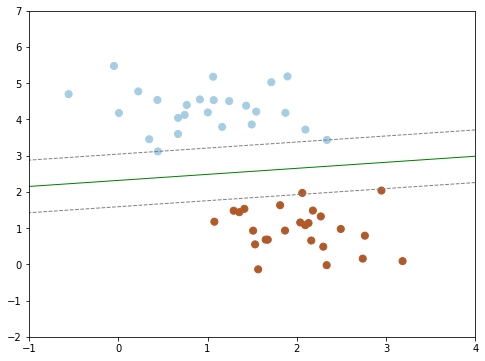

In [34]:
# Plot the separation hyperplane
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)

# cfg.decision_function = Distance of the samples X to the separating hyperplane.
# The closer to 0, the closer the point is to the separation hyperplan
Z = np.array([clf.decision_function([t]) for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)


fig, ax = plt.subplots(figsize=(8, 6))
# Define plt style
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = ['gray', 'green', 'gray'], linewidths=1)
point_style = dict(cmap='Paired', s=50)

ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style) # levels in 'line_style' define the number of lines to be drawn

In [42]:
# Predict labels of a new random dataset

# Generaton the random dataset
X2, _ = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.80)
X2 = X2[50:, :]
# Predict the labels
y2 = clf.predict(X2)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1])

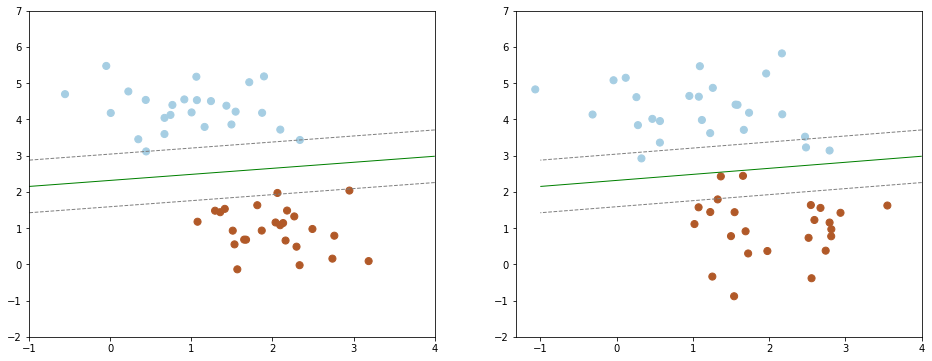

In [45]:
# Plot the 2 datasets

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Trained dataset
ax[0].scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax[0].contour(xy1, xy2, Z, **line_style) # levels in 'line_style' define the number of lines to be drawn

# Test dataset
# GEe

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style) # levels in 'line_style' define the number of lines to be drawn

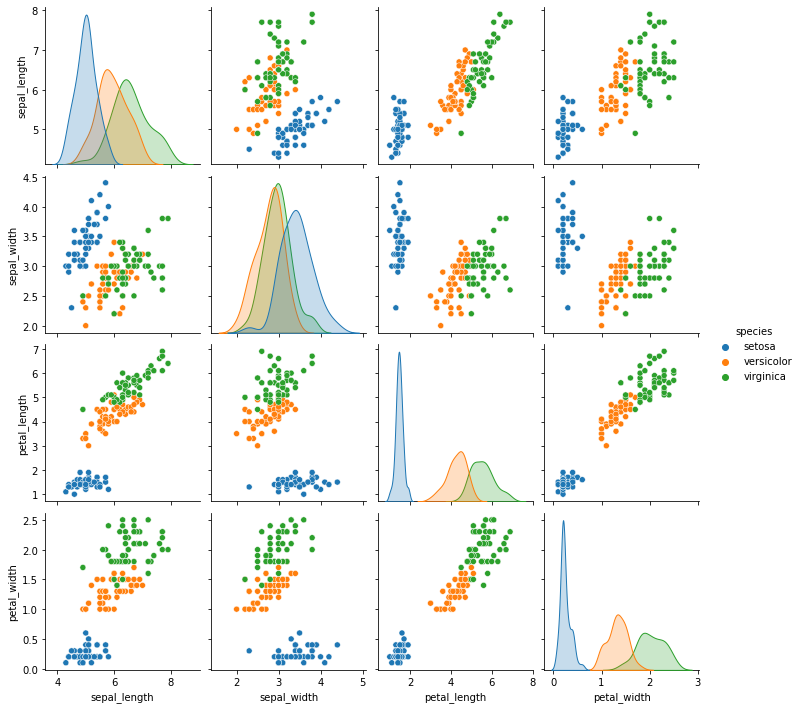

In [50]:
## INTRODUCTION TO SCIKIT-LEARN
%matplotlib inline
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

# rows = samples
# number of rows = n_samples

# columns = features
# number of columns = n_features

# iris = features matrix = X[n_samples, n_features]
# label array = target array = y[n_samples]. What we want to predict from the data.

# Visualize the data:
sns.pairplot(iris, hue='species')

In [91]:
target_col = 'species'
features_cols = [c for c in iris.columns if c != target_col]

X_iris = iris[features_cols]
y_iris = iris[target_col]
print("X shape: ", X_iris.shape, "// y shape: ", y_iris.shape)

X shape:  (150, 4) // y shape:  (150,)


### Estimator API
Each ML algorithm in Scikit-Learn is implemented via the Estimator API.
#### Steps to follow:

1. Choose a class fo model by importing the appropriate estimator class
2. Chose the model hyperparameter by instiationg this class with desired values
3. Arrange data into a feature matrix(X) and a target vector(y)
4. Fit the model to the data by calling the 'fit' method of the model
5. Apply the model to new data:
    - For Supervised Learning: Use the 'predict()' method
    - For Unsupervised Learning: use the 'predict()' or 'transform()' method

In [59]:
from sklearn.linear_model import LinearRegression
LinearRegression?

Slop coefficiant:  [1.9776566]
Intercept:  -0.9033107255311146


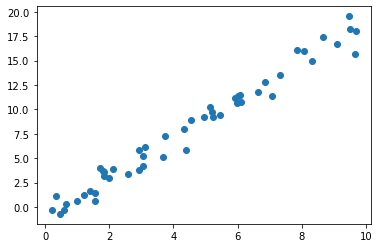

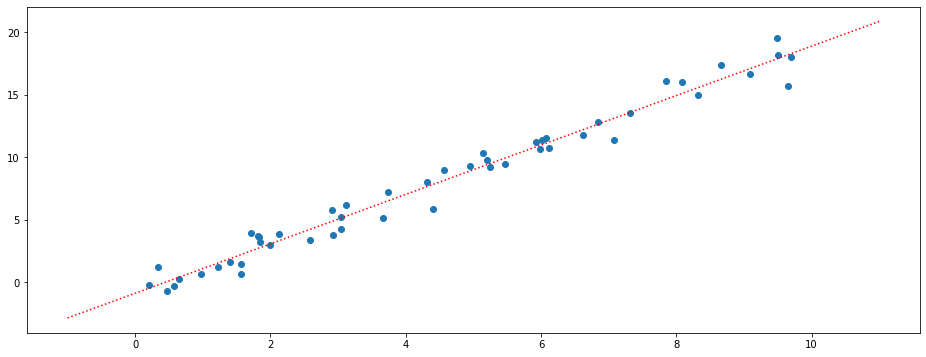

In [87]:
# Example 1 : Linear Regression

# 0. Generate data
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

# 1. Choose a class of model
from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters
model = LinearRegression(fit_intercept=True # Compute the intercept
                        )
# 3. Arrange the training data into X and y
X = x[:, np.newaxis] # (50,) -> (50, 1)

# 4. Fit the model to the training data
model.fit(X, y) # Results of the training are stored in the model attributes
# All the attributes learned during training have a "_" suffix
print("Slop coefficiant: ", model.coef_)
print("Intercept: ", model.intercept_)

# 5. Predict labels for unknown data
x_fit = np.linspace(-1, 11)
X_fit = x_fit[:, np.newaxis]
y_fit = model.predict(X_fit)

# 6. Plot the training set and test set
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(X, y)
# ax.axline((0, model.intercept_), slope=model.coef_)
ax.plot(x_fit, y_fit, color='r', ls=':')

In [104]:
# Example 2: Iris classification (Gaussian naive Bayes)

# It assumes each class is drawn from an axis-aligned Gaussian distribution
# Pros: 
## Fast
## No hyperparameter to choose

# 0. Generate the data (split it into training and test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, # By default 25% of dataset included into test set
                                                    y_iris,
                                                    random_state = 1 # Seed used by RNG
                                                   )
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

# 1. Choose a class of model
from sklearn.naive_bayes import GaussianNB
# 2. Instantiate the model
model = GaussianNB() # No hyperparameters
# 4. Fit the model
model.fit(X_train, y_train)
# 5. Predict on new data
y_model = model.predict(X_test)

# 6. Test accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_model)
print("\nModel accuracy: ", acc)

X_train shape:  (112, 4)
X_test shape:  (38, 4)
y_train shape:  (112,)
y_test shape:  (38,)

Model accuracy:  0.9736842105263158


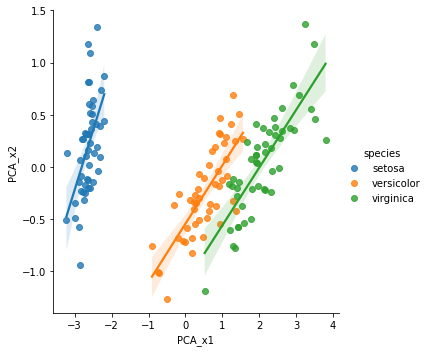

In [111]:
# Example 3: Iris dimensionality (PCA: Principal Component Analysis)
## Pros:
# Fast

# Data is 4-dimensional, Is there a suitable lower-dimensional representation that retains the essential features ?

# 1. Choose the Model
from sklearn.decomposition import PCA

# 2. Instantiate the model
model = PCA(n_components=2) # Return only 2 components(2D)

# 3. Fit to data (There is no y)
model.fit(X_iris)

# 4. Transform the data to the 2D 
X_2D = model.transform(X_iris)

# 5. Plot the results
iris["PCA_x1"] = X_2D[:, 0]
iris["PCA_x2"] = X_2D[:, 1]
# lmplot = Scatter + Regression based on FacetGrid
sns.lmplot(x = "PCA_x1",
           y = "PCA_x2",
           hue = 'species',
           data= iris)



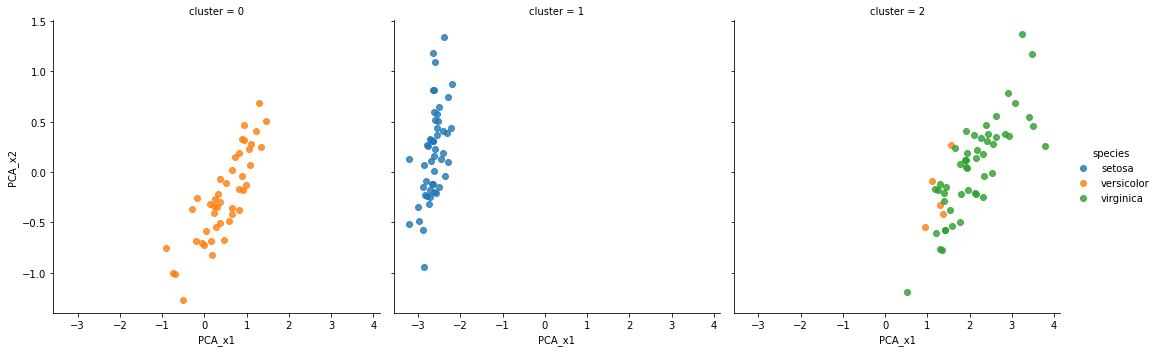

In [122]:
# Example 4: Iris clustering (GMM: Gaussian mixture model)

# 1. Choose the model
from sklearn.mixture import GaussianMixture

# 2. Instanciate the model
model = GaussianMixture(n_components = 3, # Find 3 groups
                        # Type of covariance parameter to use. 'full'
                        #Each component has its own general covariance matrix
                        covariance_type = 'full' )

# 3. Fit to data
model.fit(X_iris)

# 4. Determine cluster labels
y_model = model.predict(X_iris)

# 5. Plot the results
iris['cluster'] = y_model
sns.lmplot(x = "PCA_x1",
           y = 'PCA_x2',
           data = iris,
           hue = 'species',
           col = 'cluster',
           fit_reg=False);

# A few 'versicolor' were incorretly labeled as 'virginica'

Shape of the images:  (1797, 8, 8)


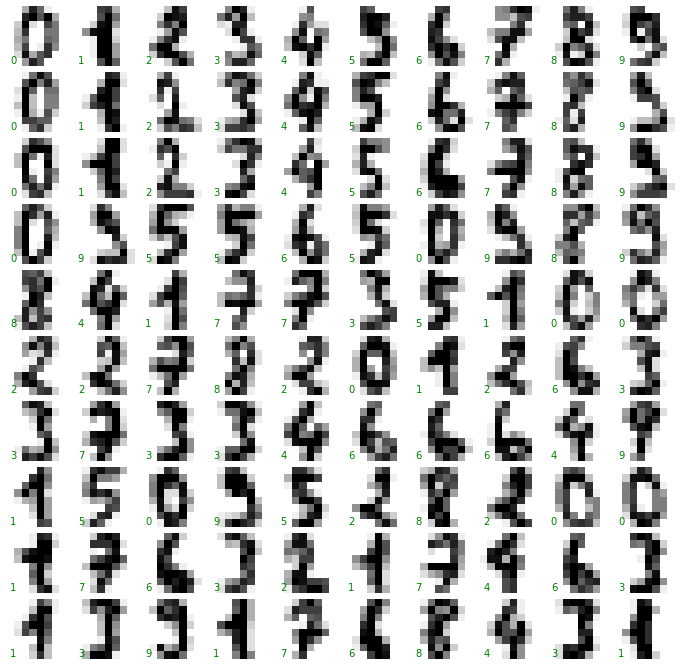

In [149]:
# Example 5: 

# 0. Load Hand-written digits data
from sklearn.datasets import load_digits

digits = load_digits()
print("Shape of the images: ", digits.images.shape) # -> 1'797 images, each consisting of 8x8 grid of pixels

# 1. Visualize the sata
fig, axes = plt.subplots(10, 10, figsize=(12, 12),
                         subplot_kw={'xticks': [],
                                     'yticks': []},
                         gridspec_kw={'hspace': 0.1,
                                      'wspace': 0.1},
                         sharex=True,
                         sharey=True)
for idx, ax in enumerate(axes.flat):
    ax.imshow(digits.images[idx],
              cmap='binary')
    ax.set_frame_on(False) # Remove borders around here subplots
    ax.text(0.05, 0.05,
            s=digits.target[idx],
            color='green',
            transform=ax.transAxes # Use coordonate of the Axes (0,0) is in bottom left corner
           )

In [170]:
# 2. Prepare the features matrix and target array

X = digits.images # Shape: (1797, 8, 8)
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]) # Shape: (1797, 64) -> 64 features
print("X shape: ", X.shape)

y = digits.target
print("y shape: ", y.shape)

X shape:  (1797, 64)
y shape:  (1797,)


X_reduced shape:  (1797, 2)


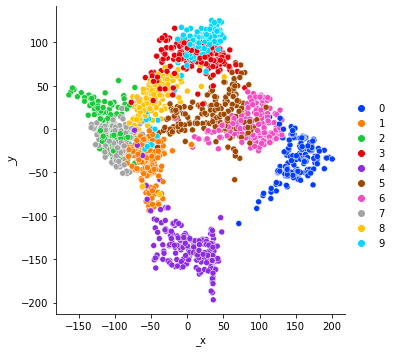

In [205]:
# 3. Dimensionality reduction (Manifold: Isomap)
# Reduce the 64 features to only 2

# Choose the model & fit to data
from sklearn.manifold import Isomap

model = Isomap(n_components=2)
model.fit(X)

# Get the transformed 2D feature matrix
X_reduced = model.transform(X)
print("X_reduced shape: ", X_reduced.shape)

# Visualize the data
sns.relplot(x = X_reduced[:, 0],
            y = X_reduced[:, 1],
            hue = y,
            palette='bright')

# Groups appear to be fairly well separated, so even a simple classification algorithm should perform well

Accuracy of the model:  0.8333333333333334


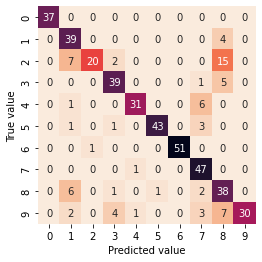

In [269]:
# 4. Classification (Gaussian naive Bayes)

# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Choose the model & fit to data
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
# Get the predictions
y_model = model.predict(X_test)

# Get the model accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the model: ", accuracy_score(y_model, y_test))

# Get the confusion matrix to get more insights on the errors
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model) # mat[i, j] = nb of observation known to be in i, but predicted in j
ax = sns.heatmap(mat,
            square=True,
            annot=True,
            cbar = False,
            cmap = sns.cm.rocket_r)
ax.set(xlabel = 'Predicted value',
       ylabel = 'True value');

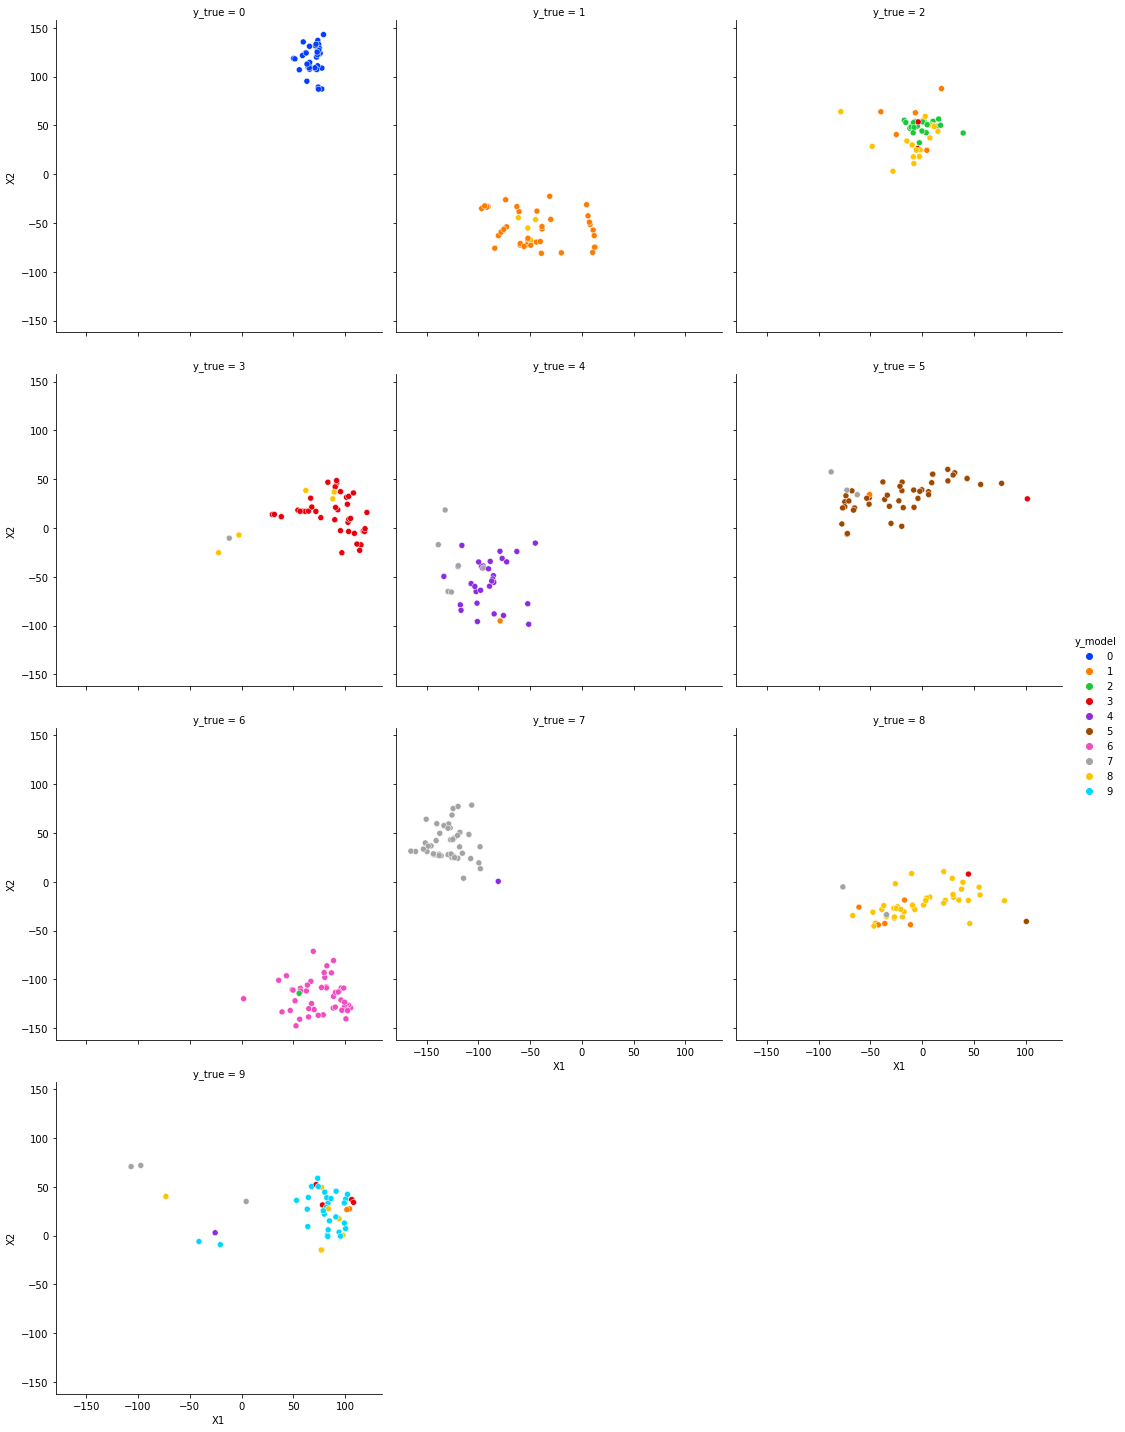

In [270]:
import pandas as pd
results = pd.DataFrame(data = {'X1': X_test_reduced[:, 0],
                                 'X2': X_test_reduced[:, 1],
                                 'y_true': y_test,
                                 'y_model': y_model})

sns.relplot(x = 'X1',
             y = 'X2',
             data = results,
             col = 'y_true',
             col_wrap = 3,
             palette='bright',
             hue = "y_model")
